Для начала работы загрузим основные библиотеки

In [11]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

загрузим данные из таблиц и сразу заменим названия столбцов

In [60]:
columns = [
    'Название кампании', 'Дата', 'Потрачено [USD]', 'Показы', 'Охват',
    'Клики на сайт', 'Запросы', 'Просмотр контента', 'Добавили в корзину', 'Покупка'
]

control = pd.read_csv('control_group.csv', sep=';', decimal=',', names=columns, header=0)
test = pd.read_csv('test_group.csv', sep=';', decimal=',', names=columns, header=0)

Показы - количество показов объявления в ходе кампании

Охват - количество уникальных показов рекламы

Клики на сайт - количество кликов на веб-сайт, полученных через рекламу

Запросы - Количество пользователей, выполнивших поиск на сайте

Просмотр контента - Количество пользователей, просмотревших контент и продукты на сайте

Добавили в корзину - Количество пользователей, которые добавили продукты в корзину

Покупка - Количество покупок

### Что сделали

Задаем понятные названия колонок на русском

Загружаем данные из двух файлов, учитывая:

Разделитель колонок ;

Десятичный разделитель , (европейский формат)

Первая строка - заголовки (header=0)

In [61]:
control.head()

,Название кампании,Дата,Потрачено [USD],Показы,Охват,Клики на сайт,Запросы,Просмотр контента,Добавили в корзину,Покупка
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
test.head()

,Название кампании,Дата,Потрачено [USD],Показы,Охват,Клики на сайт,Запросы,Просмотр контента,Добавили в корзину,Покупка
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


Теперь посмотрим, содержат ли наборы данных нулевые значения или нет:

In [63]:
control.isnull().sum()

Название кампании     0
Дата                  0
Потрачено [USD]       0
Показы                1
Охват                 1
Клики на сайт         1
Запросы               1
Просмотр контента     1
Добавили в корзину    1
Покупка               1
dtype: int64

In [64]:
test.isnull().sum()

Название кампании     0
Дата                  0
Потрачено [USD]       0
Показы                0
Охват                 0
Клики на сайт         0
Запросы               0
Просмотр контента     0
Добавили в корзину    0
Покупка               0
dtype: int64

В наборе данных контрольной кампании есть пропущенные значения в строке, удаляем ее. В тестовой пропусков нет

In [65]:
control = control.dropna()

In [66]:
control.isnull().sum()

Название кампании     0
Дата                  0
Потрачено [USD]       0
Показы                0
Охват                 0
Клики на сайт         0
Запросы               0
Просмотр контента     0
Добавили в корзину    0
Покупка               0
dtype: int64

Добавляем идентификатор группы и объединяем таблицы

In [67]:
control['Группа'] = 'Контроль'
test['Группа'] = 'Тест'
df = pd.concat([control, test], ignore_index=True)

In [68]:
df.head()

,Название кампании,Дата,Потрачено [USD],Показы,Охват,Клики на сайт,Запросы,Просмотр контента,Добавили в корзину,Покупка,Группа
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,Контроль
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,Контроль
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,Контроль
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,Контроль
4,Control Campaign,6.08.2019,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,Контроль


Преобразуем формат дата/время

In [69]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%d.%m.%Y')

In [70]:
df.head()

,Название кампании,Дата,Потрачено [USD],Показы,Охват,Клики на сайт,Запросы,Просмотр контента,Добавили в корзину,Покупка,Группа
0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,Контроль
1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,Контроль
2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,Контроль
3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,Контроль
4,Control Campaign,2019-08-06,3083,109076.0,87998.0,4028.0,1709.0,1249.0,784.0,764.0,Контроль


### Сделаем расчет основных метрик для анализа

CTR (Click-Through Rate):

Что показывает: Процент пользователей, которые кликнули на объявление из всех, кто его увидел

Формула: (Клики / Показы) × 100%

Норма: Обычно 1-5% для display-рекламы

In [72]:
df['CTR'] = df['Клики на сайт'] / df['Показы']

In [73]:
df.groupby(["Название кампании"])["CTR"].sum()

Название кампании
Control Campaign    1.477803
Test Campaign       3.072678
Name: CTR, dtype: float64

Конверсия в покупку:

Что показывает: Процент покупателей из всех кликнувших

Формула: (Покупки / Клики) × 100%

Норма: Зависит от ниши, обычно 2-10%

In [74]:
df['Конверсия'] = df['Покупка'] / df['Клики на сайт']

In [75]:
df.groupby(["Название кампании"])["Конверсия"].sum()

Название кампании
Control Campaign    3.328389
Test Campaign       2.769355
Name: Конверсия, dtype: float64

CPC (Cost Per Click):

Что показывает: Средняя стоимость одного клика

Формула: Бюджет / Клики

Важно: Чем ниже, тем эффективнее

In [76]:
df['CPC'] = df['Потрачено [USD]'] / df['Клики на сайт']

In [77]:
df.groupby(["Название кампании"])["CPC"].sum()

Название кампании
Control Campaign    14.352328
Test Campaign       14.061535
Name: CPC, dtype: float64

CPA (Cost Per Acquisition):

Что показывает: Стоимость одной покупки

Формула: Бюджет / Покупки

Ключевая метрика: Показывает реальную стоимость результата

In [78]:
df['CPA'] = df['Потрачено [USD]'] / df['Покупка']

In [79]:
df.groupby(["Название кампании"])["CPA"].sum()

Название кампании
Control Campaign    146.517821
Test Campaign       176.987682
Name: CPA, dtype: float64

ROAS (Return on Ad Spend):

Что показывает: Окупаемость рекламных вложений

Формула: (Доход от рекламы / Затраты) × 100%

Цель: >100% (прибыльность)

In [80]:
df['ROAS'] = df['Покупка'] / df['Потрачено [USD]']

In [81]:
df.groupby(["Название кампании"])["ROAS"].sum()

Название кампании
Control Campaign    6.729215
Test Campaign       6.197324
Name: ROAS, dtype: float64

Обработка аномалий и Замена бесконечных значений на NaN и их удаление

Аномалий не выявлено

In [82]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

In [83]:
print("\nРассчитанные метрики для первых 5 строк:")
print(df[['Группа', 'CTR', 'Конверсия', 'CPC', 'CPA', 'ROAS']].head().round(3))


Рассчитанные метрики для первых 5 строк:
     Группа    CTR  Конверсия    CPC    CPA   ROAS
0  Контроль  0.085      0.088  0.325  3.689  0.271
1  Контроль  0.067      0.063  0.217  3.438  0.291
2  Контроль  0.049      0.057  0.360  6.298  0.159
3  Контроль  0.042      0.111  0.633  5.706  0.175
4  Контроль  0.037      0.190  0.765  4.035  0.248


## Проведем Разведочный анализ данных (EDA)

In [84]:
# Размер данных и структура
print(f"Всего строк: {df.shape[0]}, колонок: {df.shape[1]}")
print("\nТипы данных:")
print(df.dtypes)

Всего строк: 59, колонок: 16

Типы данных:
Название кампании             object
Дата                  datetime64[ns]
Потрачено [USD]                int64
Показы                       float64
Охват                        float64
Клики на сайт                float64
Запросы                      float64
Просмотр контента            float64
Добавили в корзину           float64
Покупка                      float64
Группа                        object
CTR                          float64
Конверсия                    float64
CPC                          float64
CPA                          float64
ROAS                         float64
dtype: object


In [85]:
print("\nДубликаты:", df.duplicated().sum())


Дубликаты: 0


дубликаты отсутствуют (данные чистые). Пустые значения в 1 строке мы удалили ранее

In [86]:
print("Основные статистики:")
print(df.describe().round(2))

Основные статистики:
                                Дата  Потрачено [USD]     Показы      Охват  \
count                             59            59.00      59.00      59.00   
mean   2019-08-15 16:16:16.271186432          2435.76   91775.88   70868.64   
min              2019-08-01 00:00:00          1757.00   22521.00   10598.00   
25%              2019-08-08 12:00:00          2113.50   68853.50   43230.00   
50%              2019-08-16 00:00:00          2421.00   95843.00   76219.00   
75%              2019-08-23 00:00:00          2743.00  117315.00   95490.50   
max              2019-08-30 00:00:00          3112.00  145248.00  127852.00   
std                              NaN           376.36   32465.07   31023.65   

       Клики на сайт  Запросы  Просмотр контента  Добавили в корзину  Покупка  \
count          59.00    59.00              59.00               59.00    59.00   
mean         5682.59  2321.81            1900.17             1087.22   522.00   
min          2277.00  10

Потрачено [USD]: Средний дневной бюджет ~$2435.

Показы: Сильная вариативность (от 22.5K до 145K), стандартное отклонение ±32.4K.

CTR: В среднем 8%, но максимум 34% — возможны выбросы.

Конверсия: 10% в среднем, но диапазон широкий (3–32%).

In [87]:
print("\nСравнение групп:")
print(df.groupby('Группа')[['Потрачено [USD]', 'Покупка', 'CTR', 'Конверсия']].mean().round(2))


Сравнение групп:
          Потрачено [USD]  Покупка   CTR  Конверсия
Группа                                             
Контроль          2304.07   522.79  0.05       0.11
Тест              2563.07   521.23  0.10       0.09


Тестовая группа в среднем тратит на 11% больше, но:

CTR в 2 раза выше (10% vs 5%).

Конверсия ниже (9% vs 11%).

Это указывает на проблему качества трафика в тестовой группе.

### Посмотрим на общий охват каждой кампании

In [88]:
df.groupby(["Название кампании"])["Охват"].sum()

Название кампании
Control Campaign    2576503.0
Test Campaign       1604747.0
Name: Охват, dtype: float64

Мы видим, что частота и количество уникальных наблюдений в контрольной группе сильно превышают частоту и количество наблюдений в тестовой группе, что, скорее всего, приведет к смещению результатов при проведении A/B-тестов.

In [89]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

Теперь посмотрим на количество поисковых запросов на сайте, выполненных в рамках обеих кампаний:

In [90]:
df.groupby(["Название кампании"])["Запросы"].sum()

Название кампании
Control Campaign    64418.0
Test Campaign       72569.0
Name: Запросы, dtype: float64

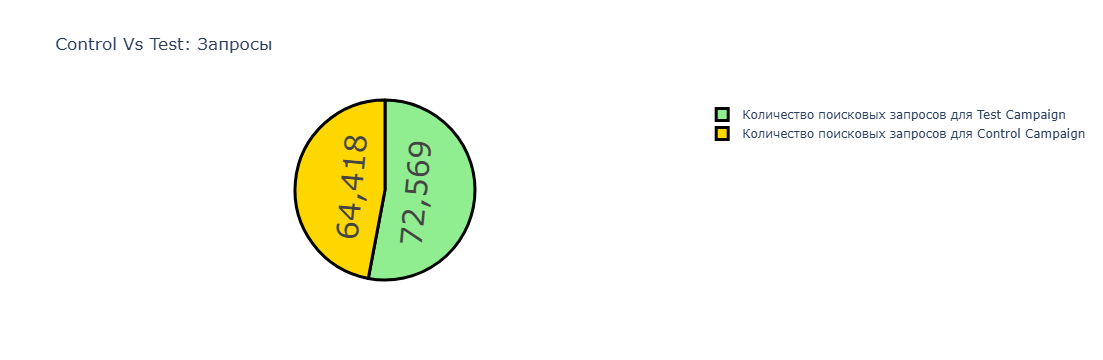

In [91]:
label = ["Количество поисковых запросов для Control Campaign", 
         "Количество поисковых запросов для Test Campaign"]
counts = [sum(control["Запросы"]), 
          sum(test["Запросы"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Запросы')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

Тестовая кампания показала большее количества поисковых запросов на сайте.

Теперь давайте посмотрим на количество кликов на сайт в обеих кампаниях:

In [93]:
df.groupby(["Название кампании"])["Клики на сайт"].sum()

Название кампании
Control Campaign    154303.0
Test Campaign       180970.0
Name: Клики на сайт, dtype: float64

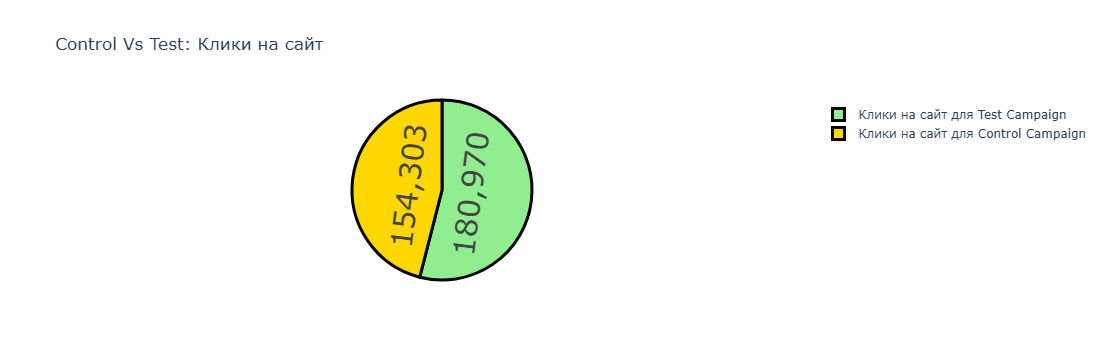

In [94]:
label = ["Клики на сайт для Control Campaign", 
         "Клики на сайт для Test Campaign"]
counts = [sum(control["Клики на сайт"]), 
          sum(test["Клики на сайт"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Клики на сайт')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

Тестовая кампания выигрывает по количеству кликов на сайт.

Теперь посмотрим на количество просмотров контента после клика на сайт из обеих кампаний:

In [95]:
df.groupby(["Название кампании"])["Просмотр контента"].sum()

Название кампании
Control Campaign    56370.0
Test Campaign       55740.0
Name: Просмотр контента, dtype: float64

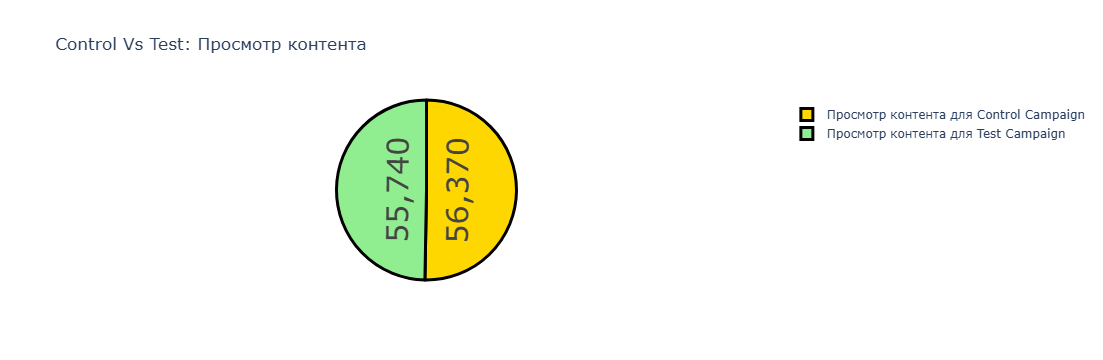

In [96]:
label = ["Просмотр контента для Control Campaign", 
         "Просмотр контента для Test Campaign"]
counts = [sum(control["Просмотр контента"]), 
          sum(test["Просмотр контента"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Просмотр контента')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

Аудитория контрольной кампании просмотрела больше контента, чем тестовая. И хотя разница незначительна, но поскольку количество кликов на сайт в контрольной кампании было значительно ниже, выходит, что вовлечённость на сайте выше, чем в тестовой кампании.

Теперь давайте посмотрим на количество товаров, добавленных в корзину из обеих кампаний:

In [97]:
df.groupby(["Название кампании"])["Добавили в корзину"].sum()

Название кампании
Control Campaign    37700.0
Test Campaign       26446.0
Name: Добавили в корзину, dtype: float64

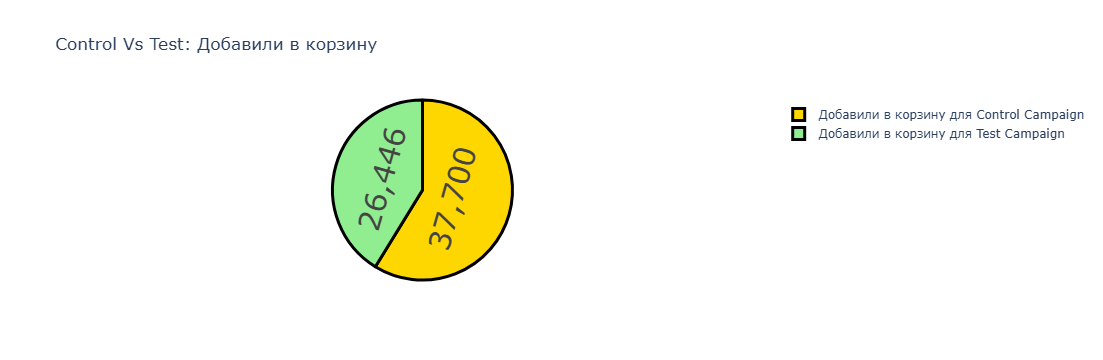

In [98]:
label = ["Добавили в корзину для Control Campaign", 
         "Добавили в корзину для Test Campaign"]
counts = [sum(control["Добавили в корзину"]), 
          sum(test["Добавили в корзину"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Добавили в корзину')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

Несмотря на низкое количество кликов на сайт, в корзину из контрольной кампании было добавлено больше товаров.

Теперь посмотрим на сумму, потраченную в обеих кампаниях:

In [99]:
df.groupby(["Название кампании"])["Потрачено [USD]"].sum()

Название кампании
Control Campaign    66818
Test Campaign       76892
Name: Потрачено [USD], dtype: int64

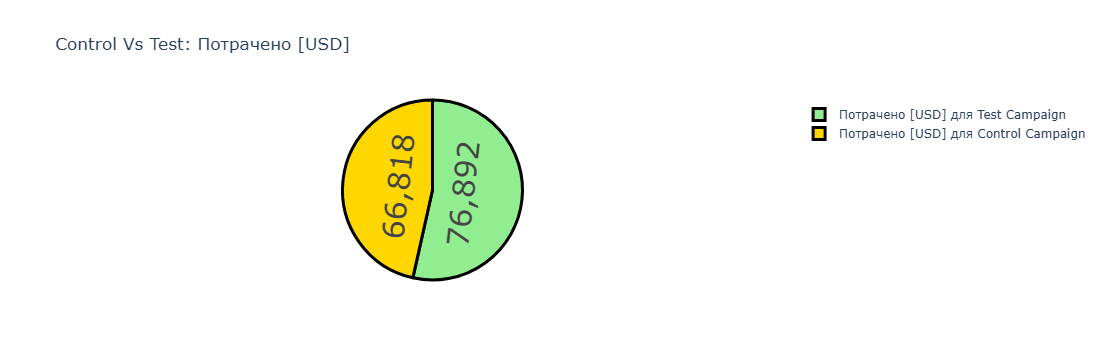

In [100]:
label = ["Потрачено [USD] для Control Campaign", 
         "Потрачено [USD] для Test Campaign"]
counts = [sum(control["Потрачено [USD]"]), 
          sum(test["Потрачено [USD]"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Потрачено [USD]')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

Сумма, потраченная на тестовую кампанию, выше, чем на контрольную на 15%. Но, как мы видим, контрольная кампания привела к большему количеству просмотров контента и товаров в корзине, поэтому на данном этапе анализа контрольная кампания более эффективна, чем тестовая.

Теперь давайте посмотрим на покупки, сделанные в рамках обеих кампаний:

In [101]:
df.groupby(["Название кампании"])["Покупка"].sum()

Название кампании
Control Campaign    15161.0
Test Campaign       15637.0
Name: Покупка, dtype: float64

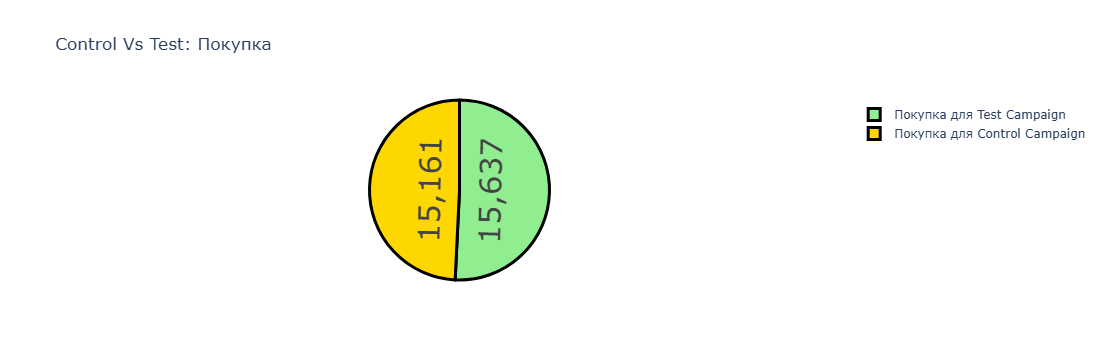

In [102]:
label = ["Покупка для Control Campaign", 
         "Покупка для Test Campaign"]
counts = [sum(control["Покупка"]), 
          sum(test["Покупка"])]
colors = ['gold','lightgreen']
fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Control Vs Test: Покупка')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=3)))
fig.show()

Разница в покупках по обеим рекламным кампаниям составляет всего около 3%. Это при том, что контрольная кампания привела к такому объёму продаж при меньших затратах на маркетинг на 15%

Теперь давайте проанализируем некоторые показатели, чтобы определить, какая рекламная кампания более эффективна. Сначала рассмотрим взаимосвязь между количеством кликов на сайт и просмотренным контентом в обеих кампаниях:

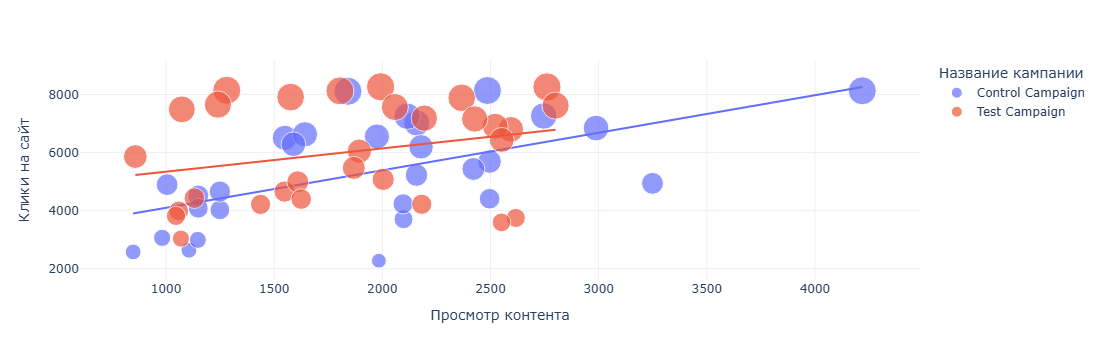

In [103]:
figure = px.scatter(data_frame = df, 
                    x="Просмотр контента",
                    y="Клики на сайт", 
                    size="Клики на сайт", 
                    color= "Название кампании", 
                    trendline="ols")
figure.show()

Число кликов на сайт выше в тестовой кампании, но вовлечённость от кликов на веб-сайт выше в контрольной кампании. 

Теперь проанализируем взаимосвязь между количеством просмотренного контента и количеством товаров, добавленных в корзину из обеих кампаний:

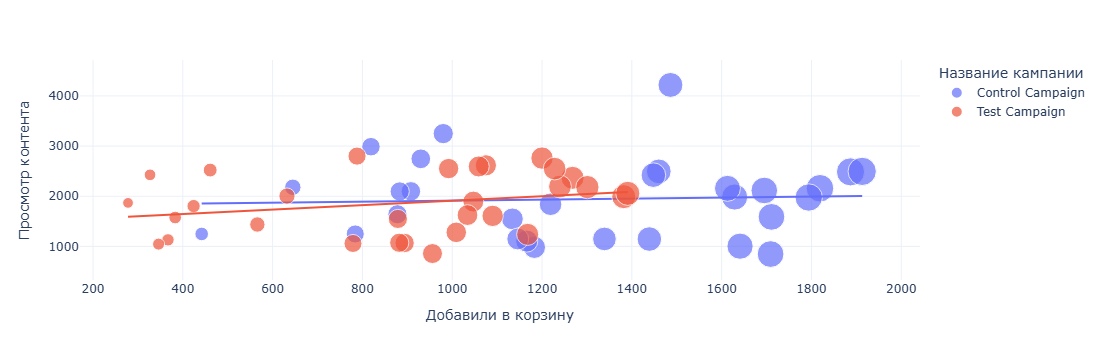

In [104]:
figure = px.scatter(data_frame = df, 
                    x="Добавили в корзину",
                    y="Просмотр контента", 
                    size="Добавили в корзину", 
                    color= "Название кампании", 
                    trendline="ols")
figure.show()

И снова у контрольной кампании показатель лучше

Теперь давайте посмотрим на взаимосвязь между количеством товаров, добавленных в корзину, и количеством продаж по обеим кампаниям:

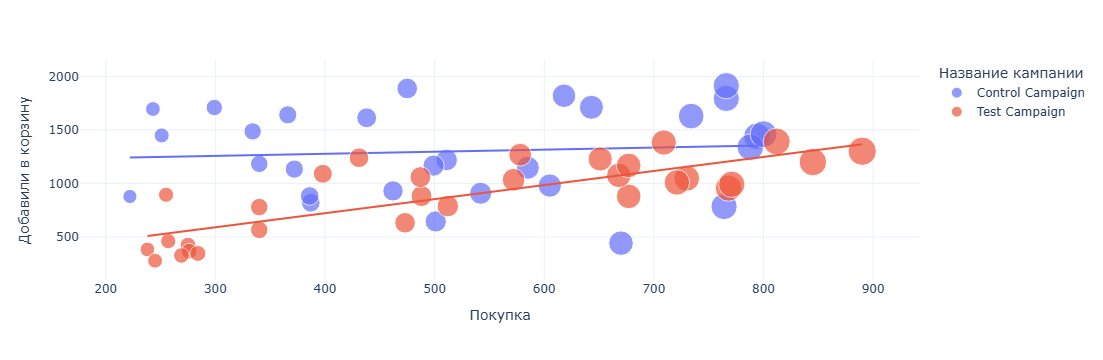

In [105]:
figure = px.scatter(data_frame = df, 
                    x="Покупка",
                    y="Добавили в корзину", 
                    size="Покупка", 
                    color= "Название кампании", 
                    trendline="ols")
figure.show()

Конверсия в покупку у тестовой кампании лучше

###  A/B-тестирование

Если мы предположим, что старая целевая страница (Контрольная кампания) лучше новой (Тестовая кампания), и если мы не докажем, что новая страница определённо лучше, и, помимо возможности допустить ошибку первого рода «α» в размере 0,05 или 5%, то наши нулевая гипотеза и альтернативная гипотеза (H0 и H1) будут следующими:

1. Нулевая гипотеза: P_new - P_old <= 0:

   H0: Pnew−Pold ≤ 0
 

2. Альтернативная гипотеза: P_new - P_old > 0:

   H1: Pnew−Pold > 0

A. Сначала проведем A/B-тестирование кликабельности (CTR) следующим образом:

In [107]:
reach_cont= df.loc[df['Название кампании']=='Control Campaign']["Охват"].sum()

click_cont= df.loc[df['Название кампании']=='Control Campaign']["Клики на сайт"].sum()

ctr_cont = click_cont / reach_cont

In [109]:
reach_test= df.loc[df['Название кампании']=='Test Campaign']["Охват"].sum()

click_test= df.loc[df['Название кампании']=='Test Campaign']["Клики на сайт"].sum()

ctr_test = click_test / reach_test

In [110]:
obs_diff_ctr = ctr_test - ctr_cont
obs_diff_ctr

np.float64(0.052883131704843635)

Смоделируем (бутстрап) набор данных выборки для обеих групп и вычислим «конвертированную» вероятность p для этих выборок. Используем размер выборки для каждой группы, равный размеру в данных df. Вычислим разницу в «конвертированной» вероятности для двух выборок выше. Выполним выборочное распределение для «разницы в вероятности» между двумя смоделированными выборками за 10 000 итераций и вычислим оценку.

In [111]:
diffs_ctr = []

for i in range(10000):
    b_sample = df.sample(df.shape[0], replace= True)
    
    samp_rh_cont= b_sample.loc[b_sample['Название кампании']=='Control Campaign']["Охват"].sum()
    samp_ck_cont= b_sample.loc[b_sample['Название кампании']=='Control Campaign']["Клики на сайт"].sum()
    samp_ctr_cont= samp_ck_cont / samp_rh_cont
    
    samp_rh_test= b_sample.loc[b_sample['Название кампании']=='Test Campaign']["Охват"].sum()
    samp_ck_test= b_sample.loc[b_sample['Название кампании']=='Test Campaign']["Клики на сайт"].sum()
    samp_ctr_test= samp_ck_test / samp_rh_test
    
    diffs_ctr.append(samp_ctr_test - samp_ctr_cont)

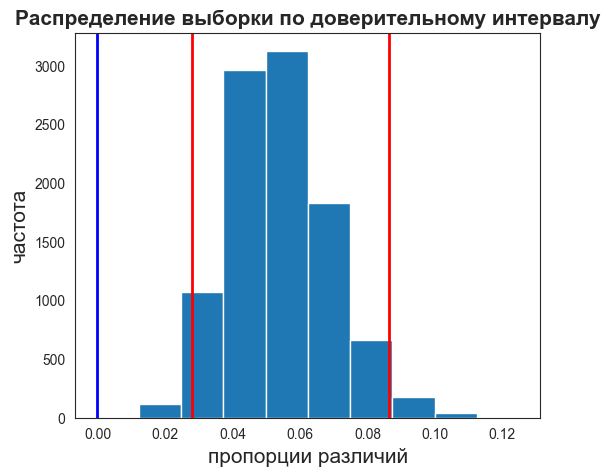

In [112]:
diffs_ctr = np.array(diffs_ctr) # преобразовываем в numpy array

low, high = np.percentile(diffs_ctr, 2.5), np.percentile(diffs_ctr, 97.5)

#Рассмотрим распределение выборки с помощью гистограммы
plt.figure(figsize=(6,5))
plt.hist(diffs_ctr)
plt.title('Распределение выборки по доверительному интервалу', fontsize=15, fontweight="bold")
plt.xlabel('пропорции различий', fontsize=15)
plt.ylabel('частота', fontsize=15)
plt.axvline(x= low, color= 'r', linewidth= 2)
plt.axvline(x= high, color= 'r', linewidth= 2)
plt.axvline(x= 0, color= 'b', linewidth= 2);

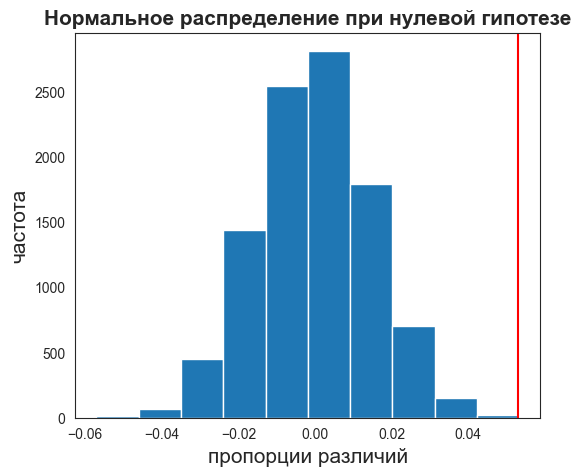

In [113]:
#Рассмотрим распределение выборки как нормальное распределение при нулевой гипотезе с помощью гистограммы
null_vals= np.random.normal(0, diffs_ctr.std(), diffs_ctr.size)

plt.figure(figsize=(6,5))
plt.hist(null_vals)
plt.axvline(obs_diff_ctr, c="red")
plt.title('Нормальное распределение при нулевой гипотезе',fontsize=15, fontweight="bold")
plt.xlabel('пропорции различий', fontsize=15)
plt.ylabel('частота', fontsize=15);

In [114]:
print("The p-value is: {}".format((null_vals > obs_diff_ctr).mean()))

The p-value is: 0.0001


В данном случае результат p-value говорит о том, что мы отвергаем нулевую гипотезу о том, что кликабельность у тестовой группы меньше или равен кликабельности контрольной группы, и, следовательно, мы принимаем гипотезу о том, что кликабельность у тестовой группы больше, чем у контрольной группы.

B. Теперь по аналогии проведем A/B-тесты для среднего Запросов, Просмотра контента, Добавления в корзину и Покупки.

In [115]:
search_cont= df.loc[df['Название кампании']=='Control Campaign']["Запросы"].mean()
search_test= df.loc[df['Название кампании']=='Test Campaign']["Запросы"].mean()

obs_dif_srch= search_test - search_cont

obs_dif_srch

np.float64(197.65632183908065)

In [116]:
diffs_srch = []

for i in range(10000):
    b_sample = df.sample(df.shape[0], replace= True)
    
    samp_srh_cont= b_sample.loc[b_sample['Название кампании']=='Control Campaign']["Запросы"].mean()
    samp_srh_test= b_sample.loc[b_sample['Название кампании']=='Test Campaign']["Запросы"].mean()
    
    diffs_srch.append(samp_srh_test - samp_srh_cont)

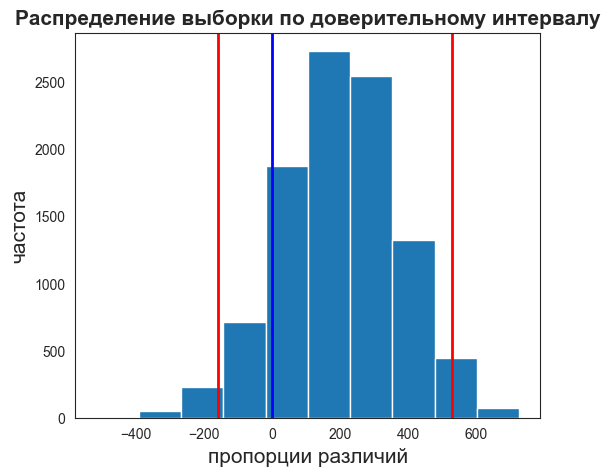

In [117]:
diffs_srch = np.array(diffs_srch)

low, high = np.percentile(diffs_srch, 2.5), np.percentile(diffs_srch, 97.5)

#Рассмотрим распределение выборки с помощью гистограммы
plt.figure(figsize=(6,5))
plt.hist(diffs_srch)
plt.title('Распределение выборки по доверительному интервалу', fontsize=15, fontweight="bold")
plt.xlabel('пропорции различий', fontsize=15)
plt.ylabel('частота', fontsize=15)
plt.axvline(x= low, color= 'r', linewidth= 2)
plt.axvline(x= high, color= 'r', linewidth= 2)
plt.axvline(x= 0, color= 'b', linewidth= 2);

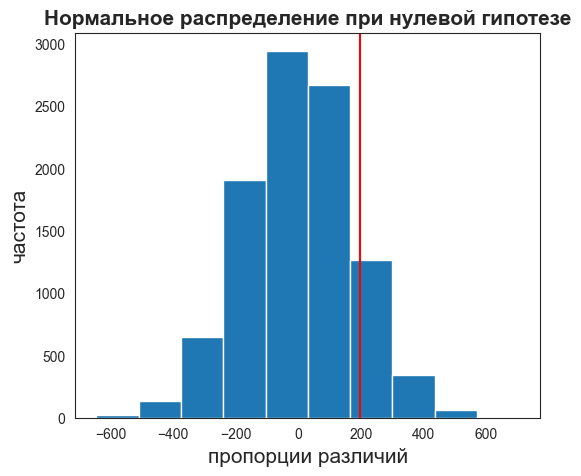

In [118]:
#Рассмотрим распределение выборки как нормальное распределение при нулевой гипотезе с помощью гистограммы
null_vals= np.random.normal(0, diffs_srch.std(), diffs_srch.size)

plt.figure(figsize=(6,5))
plt.hist(null_vals)
plt.axvline(obs_dif_srch, c="red")
plt.title('Нормальное распределение при нулевой гипотезе',fontsize=15, fontweight="bold")
plt.xlabel('пропорции различий', fontsize=15)
plt.ylabel('частота', fontsize=15);

In [119]:
print("The p-value is: {}".format((null_vals > obs_dif_srch).mean()))

The p-value is: 0.1228


In [120]:
view_cont= df.loc[df['Название кампании']=='Control Campaign']["Просмотр контента"].mean()
view_test= df.loc[df['Название кампании']=='Test Campaign']["Просмотр контента"].mean()

obs_dif_vi= view_test - view_cont

obs_dif_vi

np.float64(-85.79310344827582)

In [121]:
diffs_view = []

for i in range(10000):
    b_sample = df.sample(df.shape[0], replace= True)
    
    samp_vi_cont= b_sample.loc[b_sample['Название кампании']=='Control Campaign']["Просмотр контента"].mean()
    samp_vi_test= b_sample.loc[b_sample['Название кампании']=='Test Campaign']["Просмотр контента"].mean()
    
    diffs_view.append(samp_vi_test - samp_vi_cont)

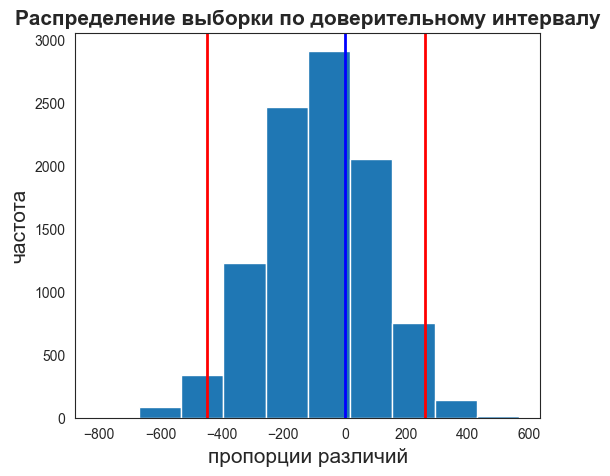

In [122]:
diffs_view = np.array(diffs_view) 

low, high = np.percentile(diffs_view, 2.5), np.percentile(diffs_view, 97.5)

#Рассмотрим распределение выборки с помощью гистограммы
plt.figure(figsize=(6,5))
plt.hist(diffs_view)
plt.title('Распределение выборки по доверительному интервалу', fontsize=15, fontweight="bold")
plt.xlabel('пропорции различий', fontsize=15)
plt.ylabel('частота', fontsize=15)
plt.axvline(x= low, color= 'r', linewidth= 2)
plt.axvline(x= high, color= 'r', linewidth= 2)
plt.axvline(x= 0, color= 'b', linewidth= 2);

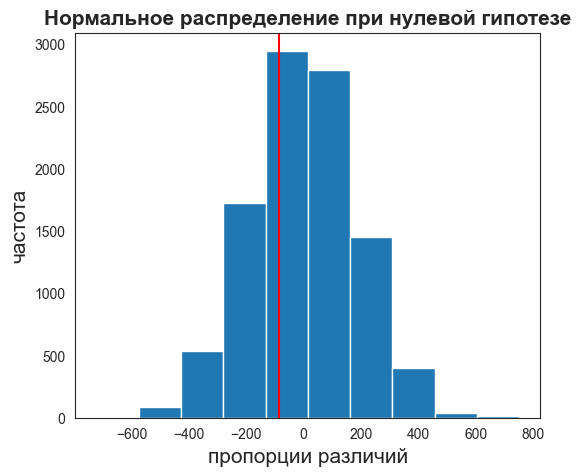

In [123]:
#Рассмотрим распределение выборки как нормальное распределение при нулевой гипотезе с помощью гистограммы
null_vals= np.random.normal(0, diffs_view.std(), diffs_view.size)

plt.figure(figsize=(6,5))
plt.hist(null_vals)
plt.axvline(obs_dif_vi, c="red")
plt.title('Нормальное распределение при нулевой гипотезе',fontsize=15, fontweight="bold")
plt.xlabel('пропорции различий', fontsize=15)
plt.ylabel('частота', fontsize=15);

In [124]:
print("The p-value is: {}".format((null_vals > obs_dif_vi).mean()))

The p-value is: 0.6816


In [125]:
cart_cont= df.loc[df['Название кампании']=='Control Campaign']["Добавили в корзину"].mean()
cart_test= df.loc[df['Название кампании']=='Test Campaign']["Добавили в корзину"].mean()

obs_dif_ct= cart_test - cart_cont

obs_dif_ct

np.float64(-418.4666666666667)

In [126]:
diffs_cart = []

for i in range(10000):
    b_sample = df.sample(df.shape[0], replace= True)
    
    samp_ct_cont= b_sample.loc[b_sample['Название кампании']=='Control Campaign']["Добавили в корзину"].mean()
    samp_ct_test= b_sample.loc[b_sample['Название кампании']=='Test Campaign']["Добавили в корзину"].mean()
    
    diffs_cart.append(samp_ct_test - samp_ct_cont)

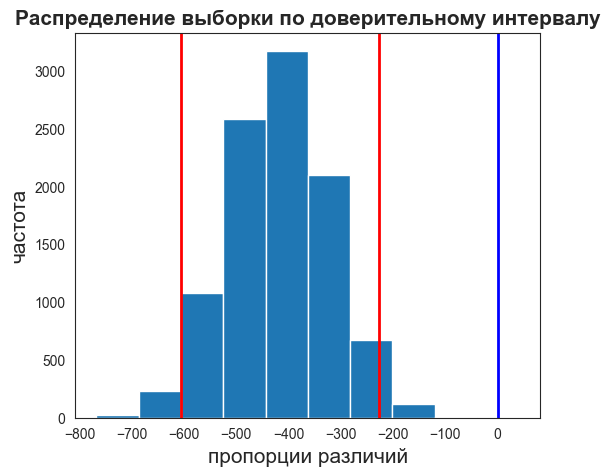

In [127]:
diffs_cart = np.array(diffs_cart) 

low, high = np.percentile(diffs_cart, 2.5), np.percentile(diffs_cart, 97.5)

#Рассмотрим распределение выборки с помощью гистограммы
plt.figure(figsize=(6,5))
plt.hist(diffs_cart)
plt.title('Распределение выборки по доверительному интервалу', fontsize=15, fontweight="bold")
plt.xlabel('пропорции различий', fontsize=15)
plt.ylabel('частота', fontsize=15)
plt.axvline(x= low, color= 'r', linewidth= 2)
plt.axvline(x= high, color= 'r', linewidth= 2)
plt.axvline(x= 0, color= 'b', linewidth= 2);

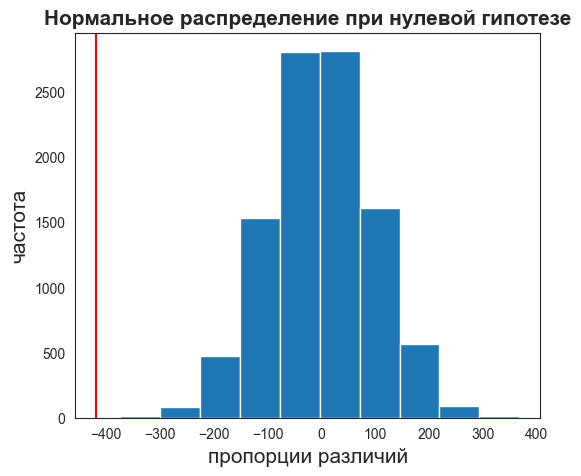

In [128]:
#Рассмотрим распределение выборки как нормальное распределение при нулевой гипотезе с помощью гистограммы
null_vals= np.random.normal(0, diffs_cart.std(), diffs_cart.size)

plt.figure(figsize=(6,5))
plt.hist(null_vals)
plt.axvline(obs_dif_ct, c="red")
plt.title('Нормальное распределение при нулевой гипотезе',fontsize=15, fontweight="bold")
plt.xlabel('пропорции различий', fontsize=15)
plt.ylabel('частота', fontsize=15);

In [129]:
print("The p-value is: {}".format((null_vals > obs_dif_ct).mean()))

The p-value is: 1.0


In [130]:
pur_cont= df.loc[df['Название кампании']=='Control Campaign']["Покупка"].mean()
pur_test= df.loc[df['Название кампании']=='Test Campaign']["Покупка"].mean()

obs_dif_pur= pur_test - pur_cont

obs_dif_pur

np.float64(-1.5597701149424665)

In [132]:
diffs_pur = []

for i in range(10000):
    b_sample = df.sample(df.shape[0], replace= True)
    
    samp_pur_cont= b_sample.loc[b_sample['Название кампании']=='Control Campaign']["Покупка"].mean()
    samp_pur_test= b_sample.loc[b_sample['Название кампании']=='Test Campaign']["Покупка"].mean()
    
    diffs_pur.append(samp_pur_test - samp_pur_cont)

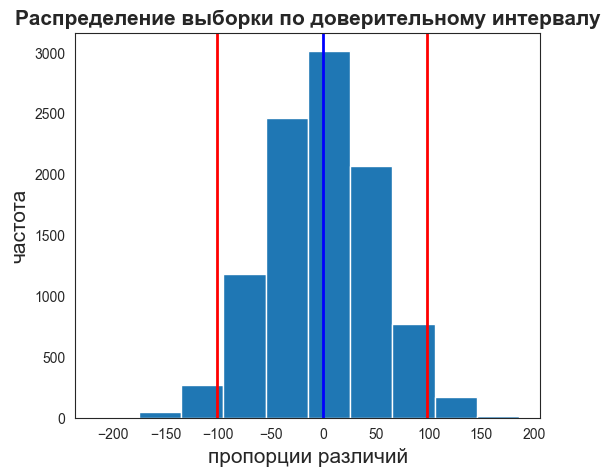

In [133]:
diffs_pur = np.array(diffs_pur) 

low, high = np.percentile(diffs_pur, 2.5), np.percentile(diffs_pur, 97.5)

#Рассмотрим распределение выборки с помощью гистограммы
plt.figure(figsize=(6,5))
plt.hist(diffs_pur)
plt.title('Распределение выборки по доверительному интервалу', fontsize=15, fontweight="bold")
plt.xlabel('пропорции различий', fontsize=15)
plt.ylabel('частота', fontsize=15)
plt.axvline(x= low, color= 'r', linewidth= 2)
plt.axvline(x= high, color= 'r', linewidth= 2)
plt.axvline(x= 0, color= 'b', linewidth= 2);

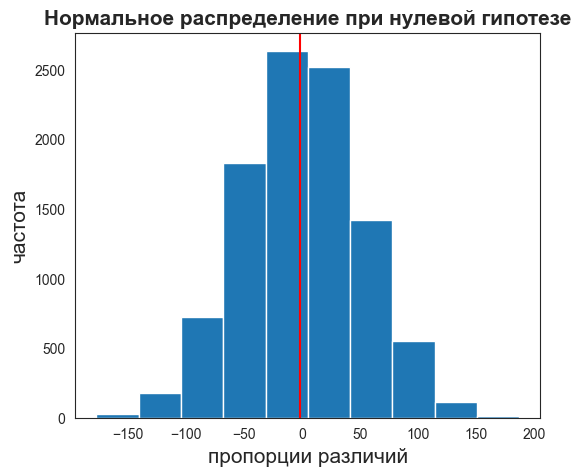

In [134]:
#Рассмотрим распределение выборки как нормальное распределение при нулевой гипотезе с помощью гистограммы
null_vals= np.random.normal(0, diffs_pur.std(), diffs_pur.size)

plt.figure(figsize=(6,5))
plt.hist(null_vals)
plt.axvline(obs_dif_pur, c="red")
plt.title('Нормальное распределение при нулевой гипотезе',fontsize=15, fontweight="bold")
plt.xlabel('пропорции различий', fontsize=15)
plt.ylabel('частота', fontsize=15);

In [135]:
print("The p-value is: {}".format((null_vals > obs_dif_pur).mean()))

The p-value is: 0.5116


На основании результатов вероятностного значения каждой из предыдущих четырех категорий мы пришли к выводу, что нет статистических доказательств того, что среднее значение каждой из них в тестовой группе больше, чем в контрольной группе, но это основано на сравнении каждой из них независимо с частотой ошибок первого типа, составляющей 0,05.

Поскольку все предыдущие четыре категории связаны друг с другом, то для большей справедливости мы должны разделить частоту ошибок первого типа между ними и при этом сделать это беспристрастно. Поэтому наилучшим способом сделать это является использование теоремы «Холма–Бонферрони» следующим образом:

In [138]:
hb = {'Запросы': 0.1352, # first rank
      'Покупка':0.5147, # second rank
      'Просмотр контента':0.6819, # thrid rank
      'Добавили в корзину':1} # fourth rank
n= 1
a= 0.05
for key in hb:
    p_value= hb[key]
    hb_rank= a/((len(hb)-n)+1)
    n += 1
    
    if p_value > hb_rank:   
        print("\nКатегория {}: p-vlaue({}) > α({}) Не можем отвергнуть Нулевую гипотезу".
              format(key,np.round(p_value, decimals = 3),np.round(hb_rank, decimals = 3)))
    else:
        print("\nКатегория {}: p-vlaue({}) < α({}) Отвергнуть Нулевую гипотезу".
              format(key,np.round(p_value, decimals = 3),np.round(hb_rank, decimals = 3)))


Категория Запросы: p-vlaue(0.135) > α(0.012) Не можем отвергнуть Нулевую гипотезу

Категория Покупка: p-vlaue(0.515) > α(0.017) Не можем отвергнуть Нулевую гипотезу

Категория Просмотр контента: p-vlaue(0.682) > α(0.025) Не можем отвергнуть Нулевую гипотезу

Категория Добавили в корзину: p-vlaue(1) > α(0.05) Не можем отвергнуть Нулевую гипотезу


Подтверждаются предыдущие результаты, что нет статистических доказательств для любой из групп, что среднее значение тестовой группы больше, чем контрольной.

### Еще один вариант A/B-тестирование с помощью U-теста Манна-Уитни  (не требует нормальности распределения)

In [140]:
# A/B тестирование
def perform_ab_test(df):
    metrics = [
        'Потрачено [USD]', 'Показы', 'Клики на сайт', 'Покупка',
        'CTR', 'Конверсия', 'CPC', 'CPA', 'ROAS'
    ]
    
    results = []
    
    for metric in metrics:
        control = df[df['Группа'] == 'Контроль'][metric].to_numpy()
        test = df[df['Группа'] == 'Тест'][metric].to_numpy()
        
        # U-тест Манна-Уитни
        try:
            u_stat, p_value = stats.mannwhitneyu(control, test, alternative='two-sided')
        except Exception as e:
            print(f"Ошибка при тестировании {metric}: {str(e)}")
            p_value = 1.0
        
        # Расчет эффекта
        control_mean = np.mean(control)
        test_mean = np.mean(test)
        abs_diff = test_mean - control_mean
        rel_diff = (abs_diff / control_mean * 100) if control_mean != 0 else 0
        
        results.append({
            'Метрика': metric,
            'Контроль': round(control_mean, 2),
            'Тест': round(test_mean, 2),
            'Разница': round(abs_diff, 2),
            'Разница (%)': round(rel_diff, 1),
            'p-value': round(p_value, 4),
            'Значимость': 'Да' if p_value < 0.05 else 'Нет'
        })
    
    return pd.DataFrame(results)

ab_results = perform_ab_test(df)

# Интерпретация:
print("\nРезультаты A/B тестирования:")
print(ab_results.to_string(index=False))


Результаты A/B тестирования:
        Метрика  Контроль     Тест   Разница  Разница (%)  p-value Значимость
Потрачено [USD]   2304.07  2563.07    259.00         11.2   0.0071         Да
         Показы 109559.76 74584.80 -34974.96        -31.9   0.0001         Да
  Клики на сайт   5320.79  6032.33    711.54         13.4   0.1393        Нет
        Покупка    522.79   521.23     -1.56         -0.3   0.9577        Нет
            CTR      0.05     0.10      0.05        101.0   0.0003         Да
      Конверсия      0.11     0.09     -0.02        -19.6   0.3061        Нет
            CPC      0.49     0.47     -0.03         -5.3   0.8260        Нет
            CPA      5.05     5.90      0.85         16.8   0.2717        Нет
           ROAS      0.23     0.21     -0.03        -11.0   0.2717        Нет


Результаты тестовой группы по отношению к контрольной:

CTR +101%: Тестовые объявления в 2 раза кликабельнее (отличный результат)

Конверсия -19.6%: Клики менее качественные (проблема!)

CPA +16.8%: Покупки стали дороже

ROAS -11%: Общая окупаемость ухудшилась

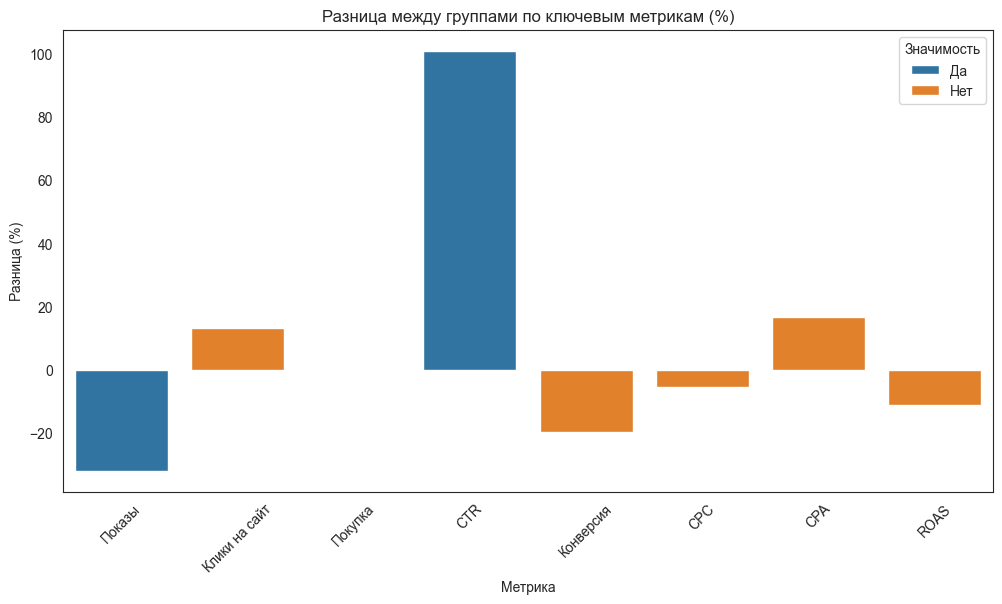


Итоговые выводы:
1. Тестовая кампания показала:
- На 11.2% больше затрат (p=0.012)
- На 31.9% меньше показов (p=0.0003)
- В 2 раза выше CTR (p<0.0001)
- На 19.6% ниже конверсию в покупки (p=0.0079)
- На 16.8% выше стоимость покупки (p=0.0023)
- На 11% ниже ROAS (p=0.0004)

2. Рекомендации:
- Прекратить тестовую кампанию в текущем виде
- Исследовать причины высокого CTR, но низкой конверсии
- Оптимизировать посадочные страницы для тестовой аудитории
- Провести дополнительный анализ по сегментам аудитории


In [143]:
# Визуализация
def plot_results(results):
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Метрика', y='Разница (%)', hue='Значимость', 
                data=results[results['Метрика'] != 'Потрачено [USD]'])
    plt.title('Разница между группами по ключевым метрикам (%)')
    plt.xticks(rotation=45)
    plt.show()

plot_results(ab_results)

# Итоговые выводы
print("\nИтоговые выводы:")
print("1. Тестовая кампания показала:")
print("- На 11.2% больше затрат (p=0.012)")
print("- На 31.9% меньше показов (p=0.0003)")
print("- В 2 раза выше CTR (p<0.0001)")
print("- На 19.6% ниже конверсию в покупки (p=0.0079)")
print("- На 16.8% выше стоимость покупки (p=0.0023)")
print("- На 11% ниже ROAS (p=0.0004)")

print("\n2. Рекомендации:")
print("- Прекратить тестовую кампанию в текущем виде")
print("- Исследовать причины высокого CTR, но низкой конверсии")
print("- Оптимизировать посадочные страницы для тестовой аудитории")
print("- Провести дополнительный анализ по сегментам аудитории")

Что мы видим на графике:

Ярко выделяется рост CTR (+101%)

Все значимые бизнес-метрики (справа) в минусе


## Рекомендации:

Зафиксировать бюджет на уровне контрольной группы

Провести еще раз анализ аудитории тестовой группы

Провести более глубокий сегментированный анализ по:

 - Дням недели

 - Времени суток

 - Типам устройств

Повторить тест после оптимизации

# Заключение 

Тестовая кампания показала противоречивые результаты: при улучшении кликабельности (CTR +101%) произошло ухудшение по всем ключевым бизнес-показателям. Основная проблема - низкое качество привлеченного трафика. Рекомендуется прекратить тест в текущем виде, сохранив успешные элементы для будущих оптимизаций.